Epoch 1/50
161/235 [===================>..........] - ETA: 15s - loss: 1.9061

KeyboardInterrupt: 

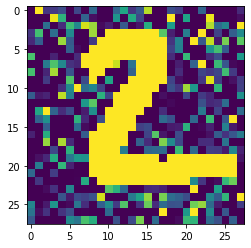

In [2]:
# autoencoder on noisy mnist
# uses conv2d


# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import optimizers
from keras.optimizers import Adam
from matplotlib import pyplot as plt

%matplotlib inline
from keras.preprocessing import image


##########
# create noisy MNIST images
# get mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

# make noisy
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))



##########
# encoder
# input layer
# 28 x 28 x greyscale
input_img = Input(shape=(28,28,1))

# convolution layer
# 32 output filters, 3x3 kernel size
nn = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)

# MaxPooling after each convolution, to reduce dimensions
# (28, 28, 32) reduced by half -> (14,14,32)
nn = MaxPooling2D((2,2), padding="same")(nn)

# another pair
nn = Conv2D(32, (3,3), activation="relu", padding="same")(nn)
# -> (7,7,32)
encoded = MaxPooling2D((2, 2), padding='same')(nn)


##########
# decoder
# mirrors encoder
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)


##########
# create, compile, train
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test_noisy, x_test))